# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Read the csv data into a pandas dataframe and display the first 5 samples

In [58]:
df = pd.read_csv('Real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [60]:
(len(df),len(df.columns))

(414, 8)

### What are the features available in the dataset?

In [61]:
(df.axes[0],df.axes[1])

(RangeIndex(start=0, stop=414, step=1),
 Index(['No', 'X1 transaction date', 'X2 house age',
        'X3 distance to the nearest MRT station',
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
        'Y house price of unit area'],
       dtype='object'))

### Check if any features have missing data

In [62]:
columns = df.columns[df.dtypes != 'object']
df[columns].isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [63]:
X = df.drop('Y house price of unit area',axis= 1)
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [64]:
y = df['Y house price of unit area']
print(y)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


### Split the dataset into train and test data

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Choose the model (Linear Regression)

In [66]:
model = LinearRegression()

### Create an Estimator object

In [26]:
LinearRegression(
    fit_intercept = True,
    normalize = False,
    copy_X = True,
    n_jobs = None
)

LinearRegression(normalize=False)

### Train the model

In [27]:
model.fit(X_train,y_train)

LinearRegression()

### Apply the model

In [69]:
predictions = model.predict(X_test)
predictions[:21]

array([12.80266482,  9.54915125, 22.51689406, 48.21322717, 31.97236387,
       37.78820944, 36.46129609, 40.76096642, 48.11455088, 40.49784012,
       44.5268797 , 32.68275185, 40.03678553, 36.55025198, 44.63712008,
       46.20750443, 38.69375684, 44.18281773, 49.06337433, 46.04905598,
       41.97528967])

### Display the coefficients

In [70]:
model.coef_

array([-2.92429686e-03,  4.68668437e+00, -2.75675355e-01, -4.24850544e-03,
        1.17832502e+00,  2.40947692e+02,  1.86694591e+01])

### Find how well the trained model did with testing data

In [71]:
print("r2 Score :" + str(r2_score(y_test,predictions)))

r2 Score :0.6534099999179948


### Plot House Age Vs Price
#### Hint: Use regplot in sns

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

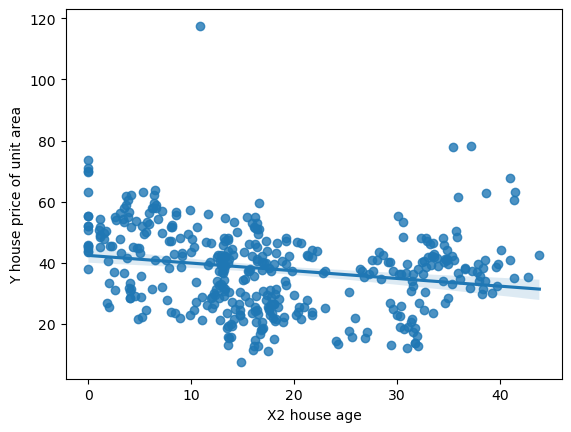

In [25]:
sns.regplot(y="Y house price of unit area", x="X2 house age", data=df, fit_reg = True)

### Plot Distance to MRT station Vs Price

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

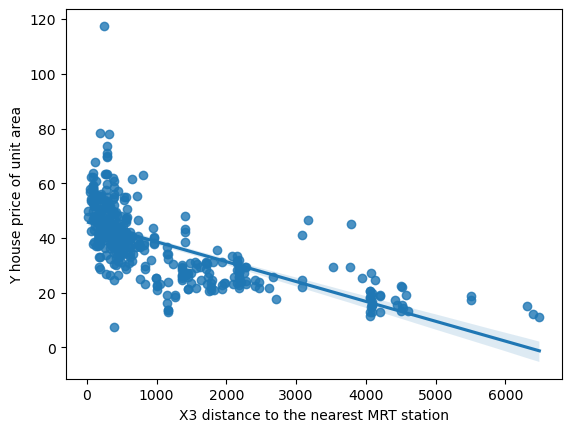

In [20]:
sns.regplot(y="Y house price of unit area", x="X3 distance to the nearest MRT station", data=df, fit_reg = True)

### Plot Number of Convienience Stores Vs Price

[Text(0.5, 1.0, 'Convienience Stores Vs Price ')]

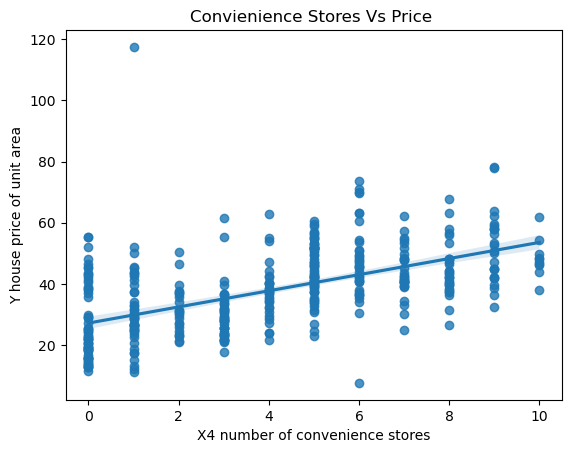

In [21]:
sns.regplot(y="Y house price of unit area", x="X4 number of convenience stores", data=df, fit_reg = True).set(
    title= "Convienience Stores Vs Price ")